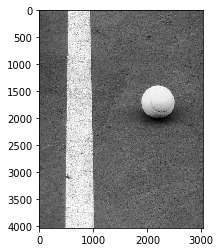

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

DATADIR = "/Users/shreyes/Documents/BallTraining"
CATEGORIES = ['IN','OUT']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap = "gray")
        plt.show()
        break
    break
        

In [3]:
print(img_array)

[[103 102 101 ...  88  90  91]
 [ 99  99  98 ...  87  87  88]
 [ 94  94  93 ...  85  85  85]
 ...
 [ 90  91  91 ...  90  91  92]
 [ 91  92  92 ...  90  91  92]
 [ 91  91  91 ...  91  91  91]]


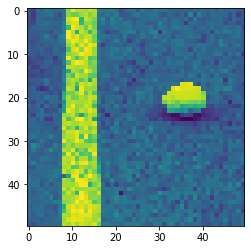

In [4]:
new_array = cv2.resize(img_array,(50,50))
plt.imshow(new_array)
plt.show()

In [5]:
training_data = []

IMG_SIZE = 50

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(50,50))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()
    

In [6]:
print(len(training_data))

240


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
1
0
1
0
1
1


In [9]:
X=[]
y=[]


In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [11]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out= open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in= open("X.pickle", "rb")
X= pickle.load(pickle_in)

X[1]

array([[[ 97],
        [ 97],
        [ 77],
        ...,
        [126],
        [ 95],
        [116]],

       [[ 95],
        [ 97],
        [ 87],
        ...,
        [100],
        [125],
        [100]],

       [[ 77],
        [ 49],
        [ 73],
        ...,
        [ 92],
        [100],
        [ 97]],

       ...,

       [[ 77],
        [ 76],
        [ 75],
        ...,
        [109],
        [109],
        [108]],

       [[ 73],
        [ 70],
        [ 76],
        ...,
        [104],
        [ 91],
        [ 94]],

       [[ 81],
        [ 85],
        [ 66],
        ...,
        [106],
        [ 81],
        [119]]], dtype=uint8)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import load_model

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X =X/255.0


model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))


model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

model.fit(X,y, batch_size = 32, epochs = 10, validation_split = 0.1)

model.save('64x3-CNN.model')

Train on 216 samples, validate on 24 samples
Epoch 1/10
216/216 [==============================] - 1s 3ms/sample - loss: 0.6823 - acc: 0.5093 - val_loss: 0.6351 - val_acc: 0.7083
Epoch 2/10
216/216 [==============================] - 1s 2ms/sample - loss: 0.6027 - acc: 0.6574 - val_loss: 0.5168 - val_acc: 0.7083
Epoch 3/10
216/216 [==============================] - 1s 3ms/sample - loss: 0.4722 - acc: 0.7824 - val_loss: 0.3230 - val_acc: 0.9167
Epoch 4/10
216/216 [==============================] - 1s 2ms/sample - loss: 0.4072 - acc: 0.8194 - val_loss: 0.2671 - val_acc: 0.8750
Epoch 5/10
216/216 [==============================] - 1s 3ms/sample - loss: 0.2765 - acc: 0.9213 - val_loss: 0.1530 - val_acc: 1.0000
Epoch 6/10
216/216 [==============================] - 1s 4ms/sample - loss: 0.1805 - acc: 0.9861 - val_loss: 0.0983 - val_acc: 1.0000
Epoch 7/10
216/216 [==============================] - 1s 3ms/sample - loss: 0.1230 - acc: 0.9907 - val_loss: 0.0523 - val_acc: 1.0000
Epoch 8/10
216/21